In [2]:


import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from IPython.core.display import clear_output
from shaolin import KungFu
class DensityPlot(KungFu):
    def __init__(self,data):
        d_kwargs= {'num_xreg':(1,40,2,10),
                 'num_yreg':(1,40,2,10),
                 'grid': True,
                 'link_bins':True,
                 'plot_density':True,
                 'reg_order':(1,10,1,1),
                 'ci':"(1,100,1,95)$N=ci&d=Confidence intervals",
                 'robust':[False],
                 'scatter':True,
                 'regression':True,
                 'marginals':(['None','Histogram','KDE','Both'],'Both'),
                 'bw':(0.001,10,0.05,0.5),
                 'Title':'#Combining plots$N=title&D=',
                 'dataset':['ALL','I','II','III','IV'],
                 'save':False,
                 #'@kernel':['gau','cos','biw','epa','tri','triw']
                }
        self.data = data
        KungFu.__init__(self,mode='interactive',box='r2|',**d_kwargs)
        self.num_xreg.widget.continuous_update=False
        self.num_yreg.widget.continuous_update=False
        self.density_plot()
        
        
        self.plot_density.value = False
        self.regression.value = False
        self.marginals.value = 'None'
        self.scatter.value = False
        self.grid.value = False
        
        self.link_bins.observe(self.link_sliders)
        self.observe(self.density_plot)
        self.link_sliders()
        """self.marginal_x.value = 'None'
        self.scatter.value = False
        self.grid.value = False
        self.plot_density.value = False"""
        self.density_plot()
        self._i_plot = 0
        #time.sleep(1)
        #self.grid.value = True
        
        
    
    def link_sliders(self,_=None):
        if self.link_bins():
            self.num_yreg.visible = False
            self.link('num_xreg','num_yreg')
        else:
            self.unlink('num_xreg','num_yreg')
            self.num_yreg.visible = True
            
    def density_plot(self,_=None):
        clear_output()
        if self.kwargs['dataset']=='ALL':
            subdf = self.data.copy()
        else:
            subdf = self.data[self.data['dataset']==self.dataset()].copy()
        x,y = subdf.x,subdf.y
        x_regions = 10
        y_regions = 10
        x_bins = np.linspace(x.min(),x.max(),num=self.kwargs['num_xreg'])
        y_bins = np.linspace(y.min(),y.max(),num=self.kwargs['num_yreg'])
        
        g = sns.JointGrid(x="x", y="y", data=subdf)
        
        g.fig.set_figwidth(14)
        g.fig.set_figheight(9)
        if self.kwargs['plot_density']:
            g = g.plot_joint(sns.kdeplot, shade=True,alpha=0.5,legend=True,bw=self.kwargs['bw'],
                             gridsize=int((len(x_bins)+len(y_bins))/2),
                             clip=((x.min(),x.max()),(y.min(),y.max())))
        
        if self.kwargs['scatter']:# and not self.kwargs['regression']:
            g = g.plot_joint(plt.scatter,s=80,alpha=0.8)
            
        
        if self.kwargs['marginals'] in ['Histogram','Both']:
            _ = g.ax_marg_x.hist(x, alpha=.6,
                                  bins=x_bins,normed=True)
            _ = g.ax_marg_y.hist(y, alpha=.6,
                                   orientation="horizontal",
                                   bins=y_bins,normed=True)
        if self.kwargs['marginals'] in ['KDE','Both']:
            clip = ((x.values.min()-0.1,x.values.max()+0.1),(y.values.min()-0.1,y.values.max()+0.1))
            g = g.plot_marginals(sns.kdeplot, shade=True,alpha=0.5,
                             gridsize=int((len(x_bins)+len(y_bins))/2))
                             #clip=clip)
        if self.kwargs['regression']:
            g = g.plot_joint(sns.regplot,
                             robust=self.kwargs['robust'],
                             ci=self.kwargs['ci'],
                             order=self.kwargs['reg_order'],
                             truncate=True,
                             scatter_kws={"s": 0})
        if self.kwargs['grid']:
            plt.grid(linewidth=2) 
            plt.xticks(x_bins)
            plt.yticks(y_bins)
            
        plt.xlim(x.values.min(),x.values.max())
        plt.ylim(y.values.min(),y.values.max())
         
        
        plt.show()
        if self.kwargs['save']:
            _ =plt.savefig("data/density_plot_{}.png".format(self._i_plot), dpi=100)
            self._i_plot += 1
        #clear_output(True)

In [3]:
from IPython.core.display import display

In [4]:
df = sns.load_dataset("anscombe")

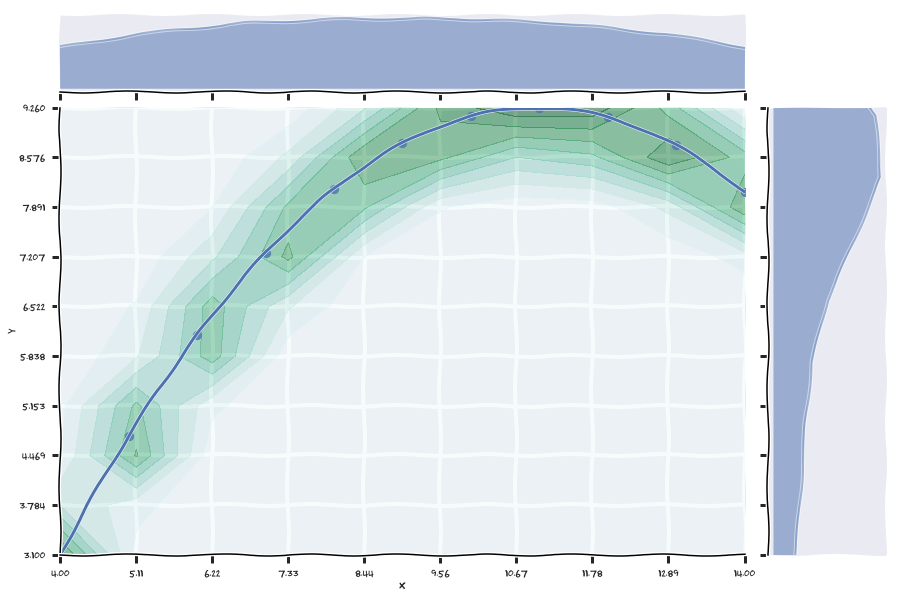

In [7]:
plt.xkcd()
display(DensityPlot(df)[0])